In [1]:
# data wrangling library
import pandas as pd
import numpy as np

# data viz library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistics library
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# descriptive analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# check missing values (percentage)
df.isnull().sum() / len(df) * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df_new = df

In [ ]:
print(df_new.shape, df.shape)

(891, 12) (891, 12)


In [ ]:
# copy dataset to df_clean variable
df_clean = df.copy()

In [ ]:
print(df_clean.shape, df.shape)

(891, 12) (891, 12)


In [ ]:
# normality test using .skew()
df['Age'].skew()

np.float64(0.38910778230082704)

In [ ]:
# data imputation for 'Age' column using Median
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_clean['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'].fillna(embarked_mode, inplace=True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_clean['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# def calculator(a, b, c):
#     return a - b + c

# print(calculator(1, 2, 3))

2


In [ ]:
# print(calculator(1, c=2, b=3))

0


In [ ]:
# print(calculator(b=1, 2, 3))

SyntaxError: positional argument follows keyword argument (ipython-input-2039767767.py, line 1)

In [ ]:
# print(calculator(c=1, b=2, a=3))

2


In [ ]:
df_clean.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
print(df_clean.shape, df.shape)

(891, 11) (891, 12)


# Feature Engineering

In [ ]:
# Age group
df_clean['Age_Group'] = pd.cut(df_clean['Age'],
                               bins=[0, 12, 18, 35, 60, np.inf],
                               labels=['Children', 'Teenagers', 'Young Adult', 'Adult', 'Senior']
                              )
df_clean.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Young Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Teenagers


In [ ]:
# Family Size
df_clean['Family_Size'] = df_clean['SibSp'] + df_clean['Parch'] + 1
df_clean.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Young Adult,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Children,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Young Adult,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Teenagers,2


In [ ]:
simple_math = lambda x: x + 1
print(simple_math(2))

3


In [ ]:
# Is Alone
df_clean['Is_Alone'] = df_clean['Family_Size'].apply(lambda x: 1 if x == 1 else 0)
df_clean.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Family_Size,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,1,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Young Adult,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adult,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Children,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Young Adult,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Teenagers,2,0


In [ ]:
# Title from Name
df_clean['Title'] = df_clean['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_clean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Family_Size,Is_Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,1,1,Mr


# Data Analysis

In [ ]:
print("Survival Rate by Pclass")
class_survival = df_clean.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
class_survival.columns = ['Survived', 'Total', 'Survival Rate']
class_survival

Survival Rate by Pclass


,Survived,Total,Survival Rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


In [ ]:
print("Survival Rate by Gender")
gender_survival = df_clean.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
gender_survival.columns = ['Survived', 'Total', 'Survival Rate']
gender_survival

Survival Rate by Gender


,Survived,Total,Survival Rate
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


In [ ]:
print("Survival Rate by Pclass and Gender")
pclass_gender_survival = df_clean.groupby(['Pclass', 'Sex'])['Survived'].agg(['sum', 'count', 'mean'])
pclass_gender_survival.columns = ['Survived', 'Total', 'Survival Rate']
pclass_gender_survival

Survival Rate by Pclass and Gender


Survived  Total  Survival Rate
Pclass Sex                                   
1      female        91     94       0.968085
       male          45    122       0.368852
2      female        70     76       0.921053
       male          17    108       0.157407
3      female        72    144       0.500000
       male          47    347       0.135447

In [ ]:
df_clean.groupby('Pclass')['Age'].mean()

,Age
Pclass,
1,36.812130
2,29.765380
3,25.932627


# Data Visualization

## Using Pandas

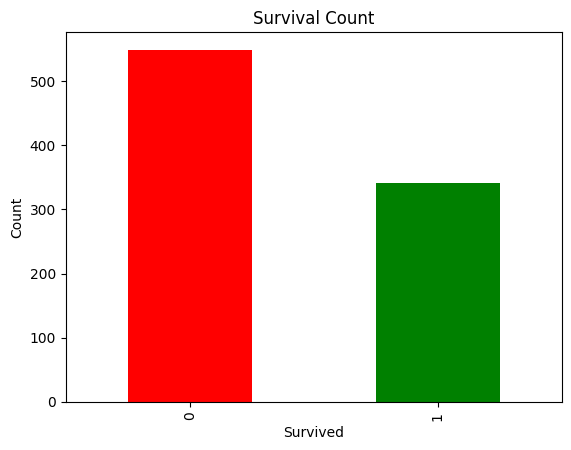

In [ ]:
df_clean['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

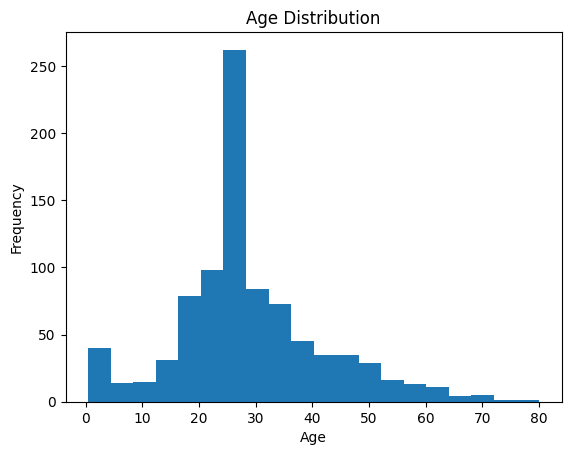

In [ ]:
# Age distribution
df_clean['Age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Matplotlib

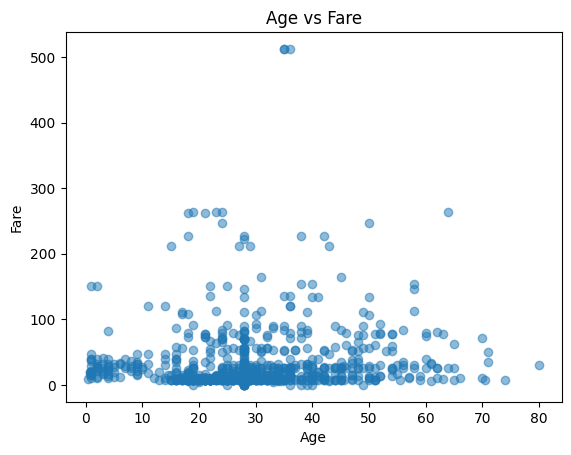

In [ ]:
## Scatterplot - Age vs Fare
plt.scatter(df_clean['Age'], df_clean['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [ ]:
df_clean[df_clean['Fare'] >= 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Family_Size,Is_Alone,Title
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Young Adult,1,1,Miss
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Adult,2,0,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Young Adult,1,1,Mr


In [ ]:
class_survival

,Survived,Total,Survival Rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


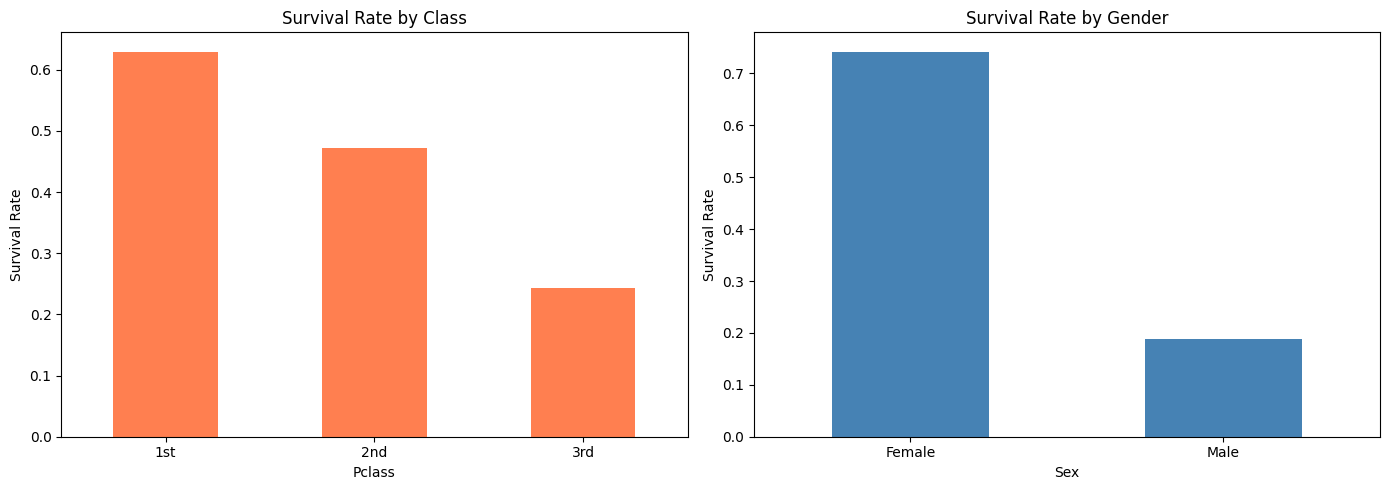

In [ ]:
# Plot 4: Multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Survival by class
class_survival['Survival Rate'].plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Survival Rate by Class')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xticklabels(['1st', '2nd', '3rd'], rotation=0)

# Survival by gender
gender_survival['Survival Rate'].plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Survival Rate by Gender')
axes[1].set_ylabel('Survival Rate')
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)

plt.tight_layout()
plt.show()


## Seaborn

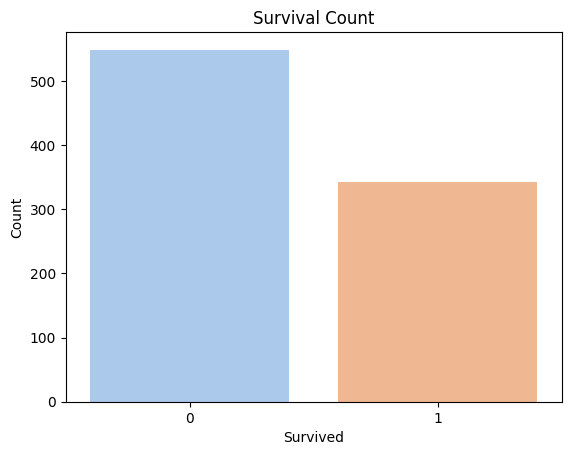

In [ ]:
sns.countplot(data=df_clean, x='Survived', palette='pastel')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

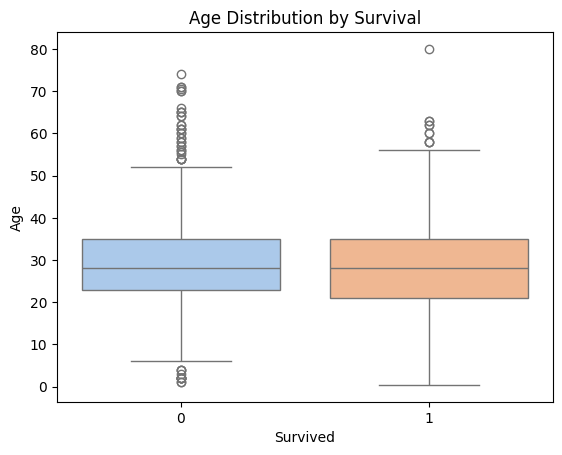

In [ ]:
sns.boxplot(data=df_clean, x='Survived', y='Age', palette='pastel')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

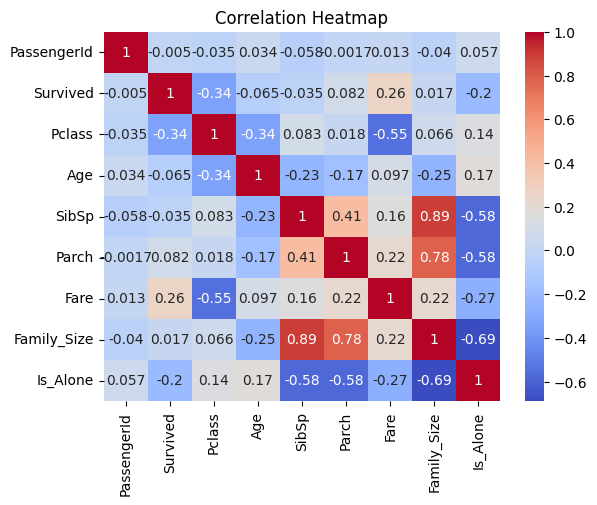

In [ ]:
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
sns.heatmap(df_clean[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Plotly

In [ ]:
print("📈 PLOTLY INTERACTIVE VISUALIZATIONS\n")

# Plot 10: Interactive bar chart
fig = px.bar(class_survival.reset_index(), x='Pclass', y='Survival Rate',
             color='Survival Rate', color_continuous_scale='Reds',
             title='Survival Rate by Class (Interactive)')
# fig.update_xaxis(tickvals=[1,2,3], ticktext=['1st Class', '2nd Class', '3rd Class'])
fig.show()

📈 PLOTLY INTERACTIVE VISUALIZATIONS

